##**1. Import Library**

In [1]:
# install category encoders
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.9 MB/s eta 0:00:00


In [2]:
# Common library used 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Encoder
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

# Imbalanced Dataset
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTENC, SMOTE

#Preprocessing ML
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler,OneHotEncoder,StandardScaler,FunctionTransformer,LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.model_selection import cross_validate,cross_val_predict,cross_val_score,ShuffleSplit,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, SelectPercentile

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#metrics evaluation
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**2. Load Dataset**

In [8]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Student Mental Health/clean_dataset.csv')
df

,gender,age,study_programs,study_years,cgpa,marital_status,depression,anxiety,panic_attack,seeking_treatment,mental_health_issues,mental_health_category
0,female,18,engineering,year_1,3.00 - 3.49,no,yes,no,yes,no,yes,moderate
1,male,21,education,year_2,3.00 - 3.49,no,no,yes,no,no,yes,mild
2,male,19,information_tecnology,year_1,3.00 - 3.49,no,yes,yes,yes,no,yes,severe
3,female,22,law,year_3,3.00 - 3.49,yes,yes,no,no,no,yes,mild
4,male,23,mathematics,year_4,3.00 - 3.49,no,no,no,no,no,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
95,female,21,computer_science,year_1,3.50 - 4.00,no,no,yes,no,no,yes,mild
96,male,18,engineering,year_2,3.00 - 3.49,no,yes,yes,no,no,yes,moderate
97,female,19,nursing,year_3,3.50 - 4.00,yes,yes,no,yes,no,yes,moderate
98,female,23,education,year_4,3.50 - 4.00,no,no,no,no,no,no,normal


In [9]:
# check missing values 
df.isna().sum()

gender                    0
age                       0
study_programs            0
study_years               0
cgpa                      0
marital_status            0
depression                0
anxiety                   0
panic_attack              0
seeking_treatment         0
mental_health_issues      0
mental_health_category    0
dtype: int64

In [10]:
# check duplicated values
df.duplicated().sum()

1

In [11]:
# drop duplicated values
df = df.drop_duplicates()

In [12]:
# check again duplicated values
df.duplicated().sum()

0

All it's clear!

##**3. Feature Engineering**

###**a. Data Formatting**

In [124]:
# replace values in age columns
df['age'] = df['age'].replace([18, 21, 19, 22, 23, 20, 24], 
                              ['18_thn', '21_thn', '19_thn', 
                               '22_thn', '23_thn', '20_thn', '24_thn'])

###**b. Data Encoding**

In [125]:
# copy previous dataframe
df_fe = df.copy()
df_fe

,gender,age,study_programs,study_years,cgpa,marital_status,depression,anxiety,panic_attack,seeking_treatment,mental_health_issues,mental_health_category
0,female,18_thn,engineering,year_1,3.00 - 3.49,no,yes,no,yes,no,yes,moderate
1,male,21_thn,education,year_2,3.00 - 3.49,no,no,yes,no,no,yes,mild
2,male,19_thn,information_tecnology,year_1,3.00 - 3.49,no,yes,yes,yes,no,yes,severe
3,female,22_thn,law,year_3,3.00 - 3.49,yes,yes,no,no,no,yes,mild
4,male,23_thn,mathematics,year_4,3.00 - 3.49,no,no,no,no,no,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
95,female,21_thn,computer_science,year_1,3.50 - 4.00,no,no,yes,no,no,yes,mild
96,male,18_thn,engineering,year_2,3.00 - 3.49,no,yes,yes,no,no,yes,moderate
97,female,19_thn,nursing,year_3,3.50 - 4.00,yes,yes,no,yes,no,yes,moderate
98,female,23_thn,education,year_4,3.50 - 4.00,no,no,no,no,no,no,normal


In [126]:
# list of columns according to data type
cat_feats = [cols for cols in df_fe.columns if (df_fe[cols].dtype=='O') and (cols != 'mental_health_category')]
num_feats = [cols for cols in df_fe.columns if (df_fe[cols].dtype=='int64') or (df_fe[cols].dtype=='float64')]
ord_feats = ['mental_health_category']

In [127]:
cat_feats

['gender',
 'age',
 'study_programs',
 'study_years',
 'cgpa',
 'marital_status',
 'depression',
 'anxiety',
 'panic_attack',
 'seeking_treatment',
 'mental_health_issues']

In [128]:
num_feats

[]

In [129]:
ord_feats

['mental_health_category']

In [130]:
# mapping ordinal feature
ordinal_mapping = [
    {'col': 'mental_health_category',
    'mapping': {'normal':0, 'mild':1, 'moderate':2, 'severe':3}}]


In [131]:
# encoding ordinal features with OrdinalEncoder
ord_encoder = ce.OrdinalEncoder(cols=ord_feats, mapping=ordinal_mapping)
df_fe = ord_encoder.fit_transform(df_fe)

In [132]:
# encoding categorical features with TargetEncoder
encoder = TargetEncoder()
df_fe[cat_feats] = encoder.fit_transform(df_fe[cat_feats], df_fe['mental_health_category'])

In [133]:
# check dataframe after encoding
df_fe

,gender,age,study_programs,study_years,cgpa,marital_status,depression,anxiety,panic_attack,seeking_treatment,mental_health_issues,mental_health_category
0,1.053947,1.080174,0.965906,1.003023,1.002761,0.831690,1.823103,0.574297,1.720885,0.957039,1.586916,2
1,0.986542,0.974134,1.018142,1.060404,1.002761,0.831690,0.506432,1.737397,0.595282,0.957039,1.586916,1
2,0.986542,1.064393,1.237306,1.003023,1.002761,0.831690,1.823103,1.737397,1.720885,0.957039,1.586916,3
3,1.053947,0.955079,1.077111,1.111942,1.002761,1.444536,1.823103,0.574297,0.595282,0.957039,1.586916,1
4,0.986542,0.994724,0.896252,0.932028,1.002761,0.831690,0.506432,0.574297,0.595282,0.957039,0.187954,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.053947,0.974134,0.966643,1.003023,1.061718,0.831690,0.506432,1.737397,0.595282,0.957039,1.586916,1
96,0.986542,1.080174,0.965906,1.060404,1.002761,0.831690,1.823103,1.737397,0.595282,0.957039,1.586916,2
97,1.053947,1.064393,1.026005,1.111942,1.061718,1.444536,1.823103,0.574297,1.720885,0.957039,1.586916,2
98,1.053947,0.994724,1.018142,0.932028,1.061718,0.831690,0.506432,0.574297,0.595282,0.957039,0.187954,0


###**b. Features Selection**

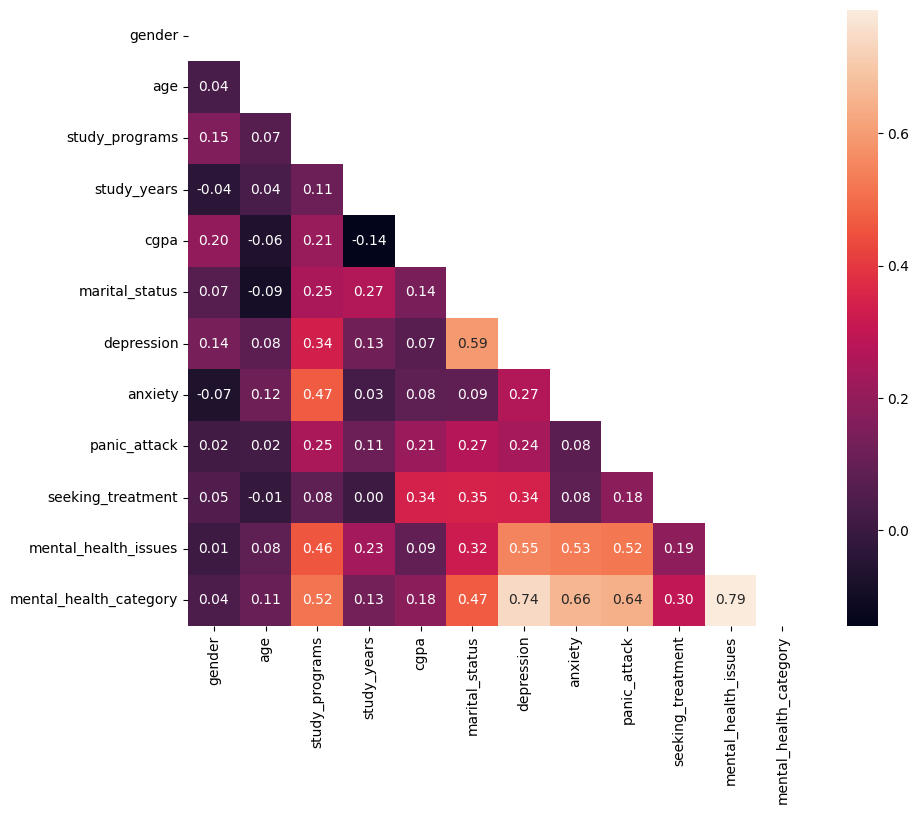

In [134]:
# check correlation all features with heatmap
corr_ = df_fe.corr()
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(df_fe.corr(), annot=True, fmt='.2f', mask=mask)
plt.show()
     


> - Karena sebenarnya kolom `mental_health_issues` dan `mental_health_category` adalah kolom label/target, jadi cukup memilih satu diantara keduanya. Dalam konteks disini, dipilih kolom `mental_health_category` sebagai kolom label/target (tujuannya untuk klasifikasi masalah kesehatan mental mahasiswa).
>
> - Berdasarkan heatmap diatas, kolom berikut ini: `depression`, `anxiety`, `panic_attack`memiliki korelasi yang **kuat** dengan kolom `mental_health_category`. sedangkan kolom `study_programs`,`marital_status` memiliki korelasi yang **sedang** dengan kolom `mental_health_category`.



##**4. Modeling**

In [135]:
# drop columns not used
df = df.drop(columns=['mental_health_issues','study_programs'])

In [136]:
# check dataframe
df

,gender,age,study_years,cgpa,marital_status,depression,anxiety,panic_attack,seeking_treatment,mental_health_category
0,female,18_thn,year_1,3.00 - 3.49,no,yes,no,yes,no,moderate
1,male,21_thn,year_2,3.00 - 3.49,no,no,yes,no,no,mild
2,male,19_thn,year_1,3.00 - 3.49,no,yes,yes,yes,no,severe
3,female,22_thn,year_3,3.00 - 3.49,yes,yes,no,no,no,mild
4,male,23_thn,year_4,3.00 - 3.49,no,no,no,no,no,normal
...,...,...,...,...,...,...,...,...,...,...
95,female,21_thn,year_1,3.50 - 4.00,no,no,yes,no,no,mild
96,male,18_thn,year_2,3.00 - 3.49,no,yes,yes,no,no,moderate
97,female,19_thn,year_3,3.50 - 4.00,yes,yes,no,yes,no,moderate
98,female,23_thn,year_4,3.50 - 4.00,no,no,no,no,no,normal


###**b. Split Train & Test**

In [137]:
# mapping ordinal feature
ordinal_mapping = [
    {'col': 'mental_health_category',
    'mapping': {'normal':0, 'mild':1, 'moderate':2, 'severe':3}}]
    
# encoding ordinal label/target with OrdinalEncoder
ord_enc = ce.OrdinalEncoder(cols=ord_feats, mapping=ordinal_mapping)
df = ord_enc.fit_transform(df)

In [138]:
# split dataset
from sklearn.model_selection import train_test_split

X = df.drop(columns=['mental_health_category'])
y = df['mental_health_category']

#split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.20, random_state= 42)

In [139]:
# check sample after split
for x in [X_train, y_train, X_test, y_test]:
    print(x.shape)

(79, 9)
(79,)
(20, 9)
(20,)


###**a. Pipeline**

In [140]:
# define categorical and numerical columns
categorical_feature = ['gender','age','study_years',
                       'cgpa','marital_status','depression',
                       'anxiety','panic_attack','seeking_treatment']

In [141]:
# use ColumnTransformer to encode features for pipeline purposes
preprocessor = ColumnTransformer(
      transformers=[('categorical', TargetEncoder(), categorical_feature)])

In [142]:
set_config(display='diagram')

###**c. Modeling**

In [143]:
# model random forest
Random_Forest = RandomForestClassifier(random_state=42, class_weight='balanced')
forest_pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('forest',Random_Forest)])
forest_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  TargetEncoder(),
                                                  ['gender', 'age',
                                                   'study_years', 'cgpa',
                                                   'marital_status',
                                                   'depression', 'anxiety',
                                                   'panic_attack',
                                                   'seeking_treatment'])])),
                ('forest',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [147]:
# use skfold for cross validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [148]:
# Random Forest Cross Val 
f1_forest = cross_val_score(forest_pipe, X_train, y_train, cv=cv, scoring='f1_micro')
print('Cross Validation Score: ', f1_forest)

#get the mean of each fold 
print("Average Cross Validation score:", f1_forest.mean() * 100)

Cross Validation Score:  [0.9375     0.9375     0.9375     1.         0.93333333]
Average Cross Validation score: 94.91666666666667


In [162]:
# add SMOTE in pipeline to oversampling the imbalance dataset
Random_Forest = RandomForestClassifier(random_state=42, class_weight='balanced')
forest_pipe_os = Pipeline([
    ('preprocessor',preprocessor),
    ('resampling', SMOTE(random_state=42)),
    ('forest',Random_Forest)])
forest_pipe_os.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  TargetEncoder(),
                                                  ['gender', 'age',
                                                   'study_years', 'cgpa',
                                                   'marital_status',
                                                   'depression', 'anxiety',
                                                   'panic_attack',
                                                   'seeking_treatment'])])),
                ('resampling', SMOTE(random_state=42)),
                ('forest',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [163]:
#Random Forest Cross Val
f1_forest = cross_val_score(forest_pipe_os, X_train, y_train, cv=cv, scoring='f1_micro')
print('Cross Validation Score: ', f1_forest)

#get the mean of each fold 
print("Average Cross Validation score:", f1_forest.mean() * 100)

Cross Validation Score:  [1.         0.9375     1.         1.         0.93333333]
Average Cross Validation score: 97.41666666666667


###**d. Hyperparameter Tuning**

In [165]:
# define the parameters for random forest model's tuned
rfr_params = {
    'forest__n_estimators': list(np.arange(10, 300)), 
    'forest__max_depth': list(np.arange(1, 20)),
    'forest__min_samples_split': [2, 5, 10],
    'forest__min_samples_leaf': [1, 2, 3, 4, 5],
    'forest__max_features': ['auto', 'sqrt'],
    'forest__bootstrap': [True, False]
}

Random_Forest_tuned = RandomForestClassifier(random_state=42, class_weight='balanced')
forest2_pipe_tuned = Pipeline([
    ('preprocessor',preprocessor),
    ('resampling', SMOTE(random_state=42)),
    ('forest',Random_Forest_tuned)])
forest2_pipe_tuned.fit(X_train, y_train)

forest_cv = RandomizedSearchCV(forest2_pipe_tuned, rfr_params, scoring="f1_micro", n_jobs=-1, verbose=1, cv=cv)
forest_cv.fit(X_train, y_train)
print(forest_cv.best_params_)
forest_tuned = forest_cv.best_estimator_.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'forest__n_estimators': 127, 'forest__min_samples_split': 5, 'forest__min_samples_leaf': 1, 'forest__max_features': 'auto', 'forest__max_depth': 14, 'forest__bootstrap': True}


###**e. Evaluation Metrics**

In [166]:
def evaluation_metrics_f1_score_train(model, X_train, y_train):
    prediction = model.predict(X_train)
    f1_micro_score = f1_score(y_train, prediction, average='micro')
    print(f'f1_micro_score : {round(f1_micro_score, 3)}')
    val = dict()
    val['f1_micro_score'] = f1_micro_score.mean() * 100
    return val

In [167]:
def evaluation_metrics_f1_score_test(model, X_test, y_test):
    prediction = model.predict(X_test)
    f1_micro_score = f1_score(y_test, prediction, average='micro')
    print(f'f1_micro_score : {round(f1_micro_score, 3)}')
    val = dict()
    val['f1-micro'] = f1_micro_score.mean() * 100
    return val

In [168]:
def evaluation_metrics_roc_auc_train(model, X_train, y_train):
    prediction = model.predict_proba(X_train)
    roc_auc = roc_auc_score(y_train, prediction, multi_class='ovo')
    print(f'roc_auc: {round(roc_auc, 3)}')
    val = dict()
    val['roc_auc'] = roc_auc.mean() * 100
    return val

In [169]:
def evaluation_metrics_roc_auc_test(model, X_test, y_test):
    prediction = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, prediction, multi_class='ovo')
    print(f'roc_auc: {round(roc_auc, 3)}')
    val = dict()
    val['roc_auc'] = roc_auc.mean() * 100
    return val

In [170]:
evaluation_metrics_roc_auc_train(forest_tuned, X_train, y_train)

roc_auc: 1.0


{'roc_auc': 100.0}

In [171]:
evaluation_metrics_roc_auc_test(forest_tuned, X_test, y_test)

roc_auc: 1.0


{'roc_auc': 100.0}

In [172]:
evaluation_metrics_f1_score_train(forest_tuned, X_train, y_train)

f1_micro_score : 1.0


{'f1_micro_score': 100.0}

In [173]:
evaluation_metrics_f1_score_test(forest_tuned, X_test, y_test)

f1_micro_score : 1.0


{'f1-micro': 100.0}

##**5.Deployment**

###**a. Save Best Model ML with pickle**

In [61]:
import pickle

In [62]:
pickle.dump(forest_tuned,open('random_forest_fix_tuned.pkl','wb'))

###**b.Load Best Model ML for Model Inference**

In [63]:
model = pickle.load(open('random_forest_fix_tuned.pkl','rb'))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  TargetEncoder(),
                                                  ['gender', 'age',
                                                   'study_years', 'cgpa',
                                                   'marital_status',
                                                   'depression', 'anxiety',
                                                   'panic_attack',
                                                   'seeking_treatment'])])),
                ('resampling', SMOTE()),
                ('forest',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced', max_depth=19,
                                        max_features='auto',
                                        min_samples_split=10, n_estimators=276,
                                        random_state=42))])

In [64]:
new_data = [{'gender': 'male',
             'age': '20_thn',
             'study_years': 'year_4',
             'cgpa':'3.50 - 4.00',
             'marital_status': 'no',
             'depression': 'yes',
             'anxiety': 'yes',
             'panic_attack': 'yes',
             'seeking_treatment': 'no' }
             ]

data_testing1= pd.DataFrame(new_data,index=[0])
data_testing1

,gender,age,study_years,cgpa,marital_status,depression,anxiety,panic_attack,seeking_treatment
0,male,20_thn,year_4,3.50 - 4.00,no,yes,yes,yes,no


In [65]:
pred = model.predict(data_testing1)

In [66]:
def prediction(pred):
    if pred[0]==0:
        return "Kondisi masalah kesehatan mental = Normal"
    elif pred[0]==1:
        return "Kondisi masalah kesehatan mental = Mild (Ringan)"
    elif pred[0]==2:
        return "Kondisi masalah kesehatan mental = Moderate (Sedang)"
    elif pred[0]==3:
        return "Kondisi masalah kesehatan mental = Severe (Berat)"
    else:
        return pred

In [67]:
prediction(pred)

'Kondisi masalah kesehatan mental = Severe (Berat)'

In [81]:
new_data = [{'gender': 'male',
             'age': '18_thn',
             'study_years': 'year_1',
             'cgpa':'3.00 - 3.49',
             'marital_status': 'no',
             'depression': 'yes',
             'anxiety': 'no',
             'panic_attack': 'yes',
             'seeking_treatment': 'yes' }
             ]

data_testing2= pd.DataFrame(new_data,index=[0])
data_testing2

,gender,age,study_years,cgpa,marital_status,depression,anxiety,panic_attack,seeking_treatment
0,male,18_thn,year_1,3.00 - 3.49,no,yes,no,yes,yes


In [82]:
pred = model.predict(data_testing2)

In [83]:
prediction(pred)

'Kondisi masalah kesehatan mental = Moderate (Sedang)'

##**6. Conclusion**

>Evaluasi Model:
- Karena menggunakan small dataset, model dapat dengan mudah memprediksi label/target berdasarkan multiple class yang ada (0: normal, 1: mild, 2: moderate, 3: severe). 
- Tantangannya disini menggunakan small dataset + imbalance dataset, yang kebanyakan kasus perlu ditangani menggunakan teknik resampling baik SMOTE atau class weight agar tidak menimbulkan bias bagi model saat memprediksi, sehingga dapat memprediksi sesuai dengan proporsi bobot kelas target.
- Metrik evaluasi yang cocok digunakan yaitu f1_score karena lebih sensitif terhadap kelas minoritas, sebab sampel data yang tidak seimbang antar kelas pada label (imbalance dataset).
- Model mendapatkan f1-score/roc-auc score = 1.0 (before tuning) dan 1.0 (after tuning), walaupun dapat dikatakan memiliki performa yang baik dalam memprediksi target, akan tetapi perlu diingat bahwa terkadang dataset yang kecil membuat model memiliki kecenderungan overfit. Dengan melakukan hyperparameter tuning pada model diharapkan model menjadi lebih mendekati fit. dari kasus disini, terlihat bahwa model dengan sempurna dapat memprediksi label dengan tingkat kesalahan 0%. ini karena model dengan sangat mudah menangkap pola-pola relasi antar sampel didalam dataset sehingga terlalu sensitif terhadap varians dan kesulitan dalam mengeneralisasi data. 
- Cara lainnya yang juga dapat digunakan yaitu menambahkan jumlah data (rows)/fitur baru yang sesuai dengan konteks dataset yang digunakan. 
>
>Implementasi Model:
- Model ini dapat digunakan sebagai **support sistem** saja, **bukan menggantikan** peran psikolog secara umum untuk mendiagnosa dan menvalidasi seseorang sedang mengalami masalah dengan kesehatan mental atau tidak. 
- Model hanya dapat digunakan secara **double checker**. prediksi model hanya **mencerminkan** kondisi masalah kesehatan mental berdasarkan **input** dari mahasiswa. selanjutnya dilakukan validasi kondisi masalah kesehatan mental yang telah diprediksi oleh model oleh para ahli kejiwaan seperti psikolog/psikiater dalam sesi konseling. 
- Model disini berperan untuk **mempercepat** proses konseling mahasiswa yang mengalami masalah dengan kesehatan mental agar segera dapat ditangani oleh ahli. dari sana, ahli dapat dengan cepat memberikan penanganan sesuai dengan kondisi kesehatan mental mahasiswa dari hasil prediksi dan divalidasi setelah proses konseling agar mengetahui kondisi kesehatan mental yang sebenarnya dialami oleh mahasiswa.

Rekomendasi:
- Model dapat dikembangkan dengan menambahkan/menggunakan dataset yang lebih kompleks fitur dan besar jumlahnya, sehingga model dapat lebih beradapatasi dengan kompleksitas untuk memprediksi label/target secara lebih expert lagi.
